In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score



import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation, Dropout

Using TensorFlow backend.


In [2]:
#import data
data = pd.read_csv('./data.csv')

In [3]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

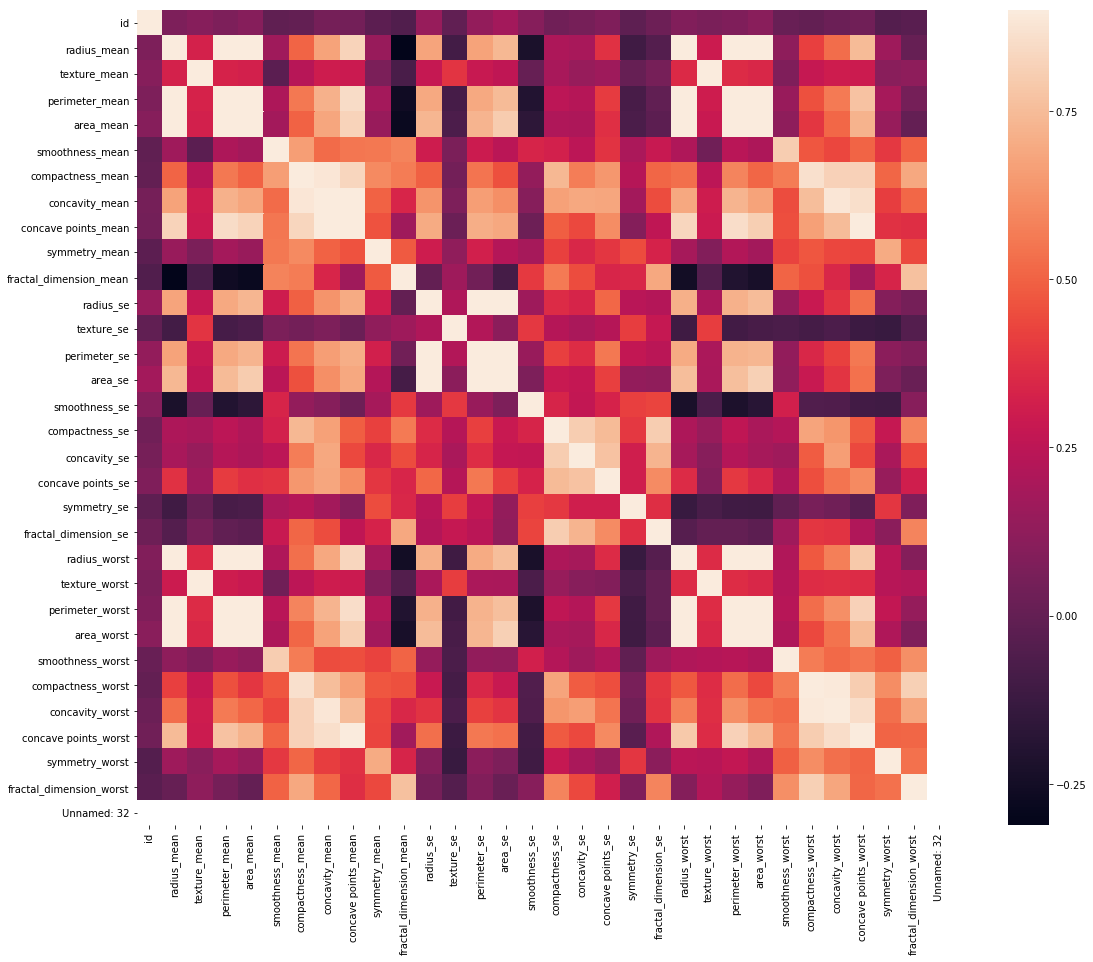

In [5]:
#Correlation map
corrmat = data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [6]:
[col for col in data.columns]

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [7]:
[col for col in data.columns if data[col].isnull().any()]

['Unnamed: 32']

In [8]:
#Let us drop 'id' which is just a number not related to 'diagnosis'
#and 'Unnamed: 32' - always takes nan value and hence we can safely drop it
data=data.drop(['id','Unnamed: 32'], axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
#let us choose only uncorrelated features
#'radius_mean','perimeter_mean','area_mean', 'radius_worst', 'perimeter_worst','area_worst' are correlated - take only 'radius_mean'
#'texture_mean','texture_worst' are correlated - take only 'texture_mean'
#'smoothness_mean','smoothness_worst' correlated-take only 'smoothness_mean'
#'compactness_mean','concavity_mean','concave points_mean','compactness_worst','concavity_worst','concave points_worst', take 'concavity_mean'
#'radius_se','perimeter_se', 'area_se'-take 'radius_se'
# 'compactness_se','concavity_se','concave points_se' take 'concavity_se','

drop_features=['perimeter_mean','area_mean', 'radius_worst', 'perimeter_worst','area_worst','texture_worst','smoothness_worst','perimeter_se', 'area_se','compactness_mean','concave points_mean','compactness_worst','concavity_worst','concave points_worst','compactness_se','concave points_se']
data=data.drop(drop_features, axis = 1)
data.head()


,diagnosis,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.05373,0.03003,0.006193,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01860,0.01389,0.003532,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.03832,0.02250,0.004571,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.05661,0.05963,0.009208,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.05688,0.01756,0.005115,0.2364,0.07678


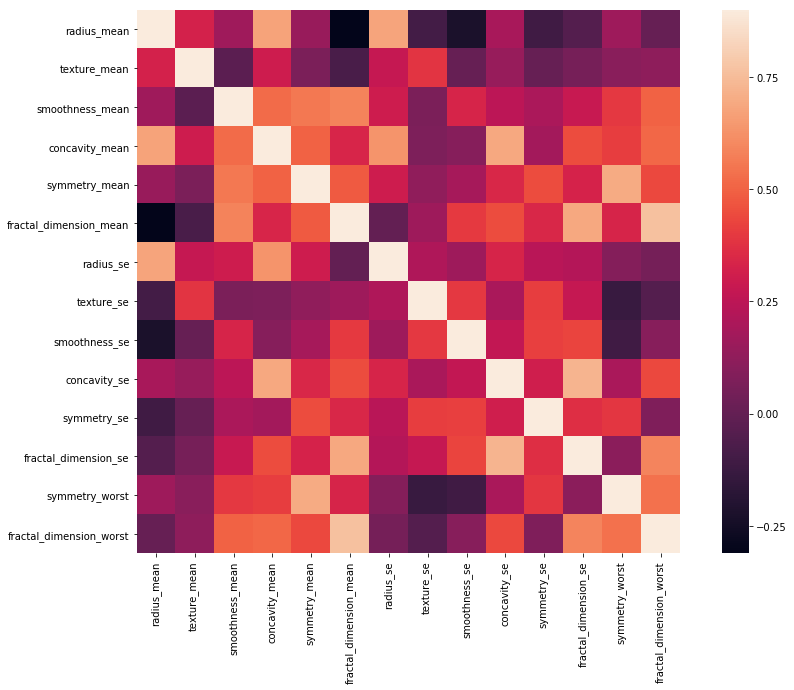

In [10]:
#Correlation map to see how features are correlated with SalePrice
corrmat = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmat, vmax=0.9, square=True)

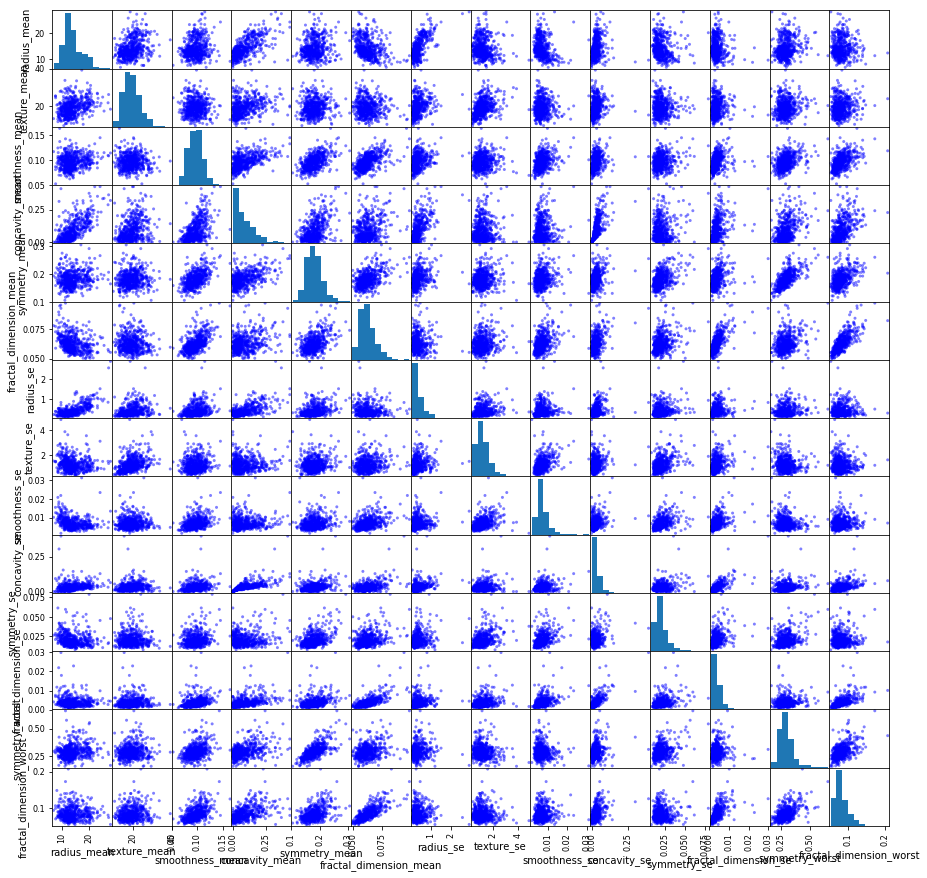

In [11]:
colors = ['red' if item==1.0 else 'blue' for item in data.loc[:,'diagnosis']]
pd.plotting.scatter_matrix(data.iloc[:,],c=colors,figsize= [15,15],diagonal='hist',marker = '.')
plt.show()

In [12]:
data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.05373,0.03003,0.006193,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01860,0.01389,0.003532,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.03832,0.02250,0.004571,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.05661,0.05963,0.009208,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.05688,0.01756,0.005115,0.2364,0.07678


In [13]:

#now lets split it into features and targets 
Y_data = data['diagnosis']
X_data = data.drop('diagnosis',axis=1)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_data = le.fit_transform(Y_data)

#split train and test data
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size = 0.2,random_state = 1)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


score: 0.9296703296703297
accuracy score: 0.9210526315789473
precision score: 0.9230769230769231
recall score: 0.8571428571428571
f1 score: 0.888888888888889


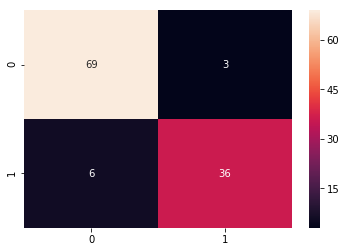

In [14]:
# Naive Bayes classifiers
gauss = GaussianNB()
gauss.fit(X_train, Y_train)
Y_pred = gauss.predict(X_test)
print 'score:', gauss.score(X_train, Y_train) 
print 'accuracy score:', accuracy_score(Y_test, Y_pred)
print 'precision score:', precision_score(Y_test, Y_pred)
print 'recall score:',recall_score(Y_test, Y_pred)
print 'f1 score:', f1_score(Y_test, Y_pred)

cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)

score: 0.967032967032967
accuracy score: 0.956140350877193
precision score: 0.9512195121951219
recall score: 0.9285714285714286
f1 score: 0.9397590361445782


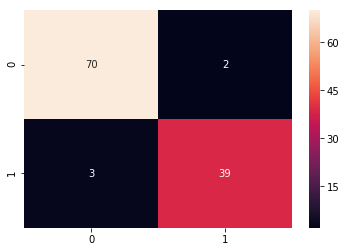

In [15]:
#perceptron
perceptron = Perceptron(alpha=0.001,max_iter=10000)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
print 'score:', perceptron.score(X_train, Y_train) 
print 'accuracy score:', accuracy_score(Y_test, Y_pred)
print 'precision score:', precision_score(Y_test, Y_pred)
print 'recall score:',recall_score(Y_test, Y_pred)
print 'f1 score:', f1_score(Y_test, Y_pred)



cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)

score: 0.9802197802197802
accuracy score: 0.9649122807017544
precision score: 0.975
recall score: 0.9285714285714286
f1 score: 0.951219512195122


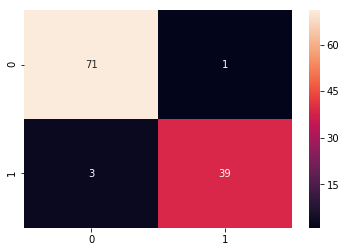

In [16]:
# SGD Classifier
sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.001,max_iter=10000)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
print 'score:', sgd.score(X_train, Y_train) 
print 'accuracy score:', accuracy_score(Y_test, Y_pred)
print 'precision score:', precision_score(Y_test, Y_pred)
print 'recall score:',recall_score(Y_test, Y_pred)
print 'f1 score:', f1_score(Y_test, Y_pred)



cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)

score: 1.0
accuracy score: 0.9649122807017544
precision score: 0.975
recall score: 0.9285714285714286
f1 score: 0.951219512195122


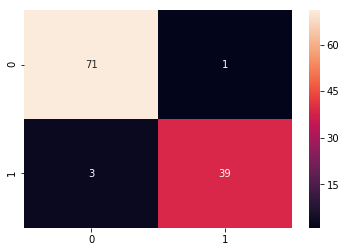

In [17]:
# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=50, criterion='entropy',random_state=30)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
print 'score:', random_forest.score(X_train, Y_train) 
print 'accuracy score:', accuracy_score(Y_test, Y_pred)
print 'precision score:', precision_score(Y_test, Y_pred)
print 'recall score:',recall_score(Y_test, Y_pred)
print 'f1 score:', f1_score(Y_test, Y_pred)



cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)

score: 1.0
accuracy score: 0.8771929824561403
precision score: 0.868421052631579
recall score: 0.7857142857142857
f1 score: 0.825


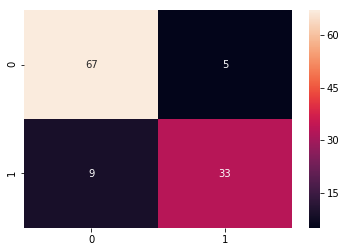

In [18]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='random')
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
print 'score:', decision_tree.score(X_train, Y_train) 
print 'accuracy score:', accuracy_score(Y_test, Y_pred)
print 'precision score:', precision_score(Y_test, Y_pred)
print 'recall score:',recall_score(Y_test, Y_pred)
print 'f1 score:', f1_score(Y_test, Y_pred)




cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)

score: 0.967032967032967
accuracy score: 0.9385964912280702
precision score: 0.972972972972973
recall score: 0.8571428571428571
f1 score: 0.9113924050632912


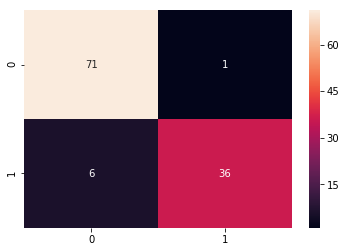

In [19]:
# K Nearest Neighbors classifiers
knn = KNeighborsClassifier(n_neighbors=8,weights='uniform', algorithm='auto')
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print 'score:', knn.score(X_train, Y_train)
print 'accuracy score:', accuracy_score(Y_test, Y_pred)
print 'precision score:', precision_score(Y_test, Y_pred)
print 'recall score:',recall_score(Y_test, Y_pred)
print 'f1 score:', f1_score(Y_test, Y_pred)



cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)

score: 0.9802197802197802
accuracy score: 0.9736842105263158
precision score: 0.975609756097561
recall score: 0.9523809523809523
f1 score: 0.963855421686747


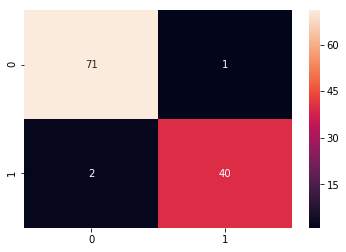

In [20]:
# LogisticRegression - gives the best results
logreg = LogisticRegression(C=5000, solver='newton-cg', multi_class='multinomial',max_iter=10000)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

print 'score:', logreg.score(X_train, Y_train) 
print 'accuracy score:', accuracy_score(Y_test, Y_pred)
print 'precision score:', precision_score(Y_test, Y_pred)
print 'recall score:',recall_score(Y_test, Y_pred)
print 'f1 score:', f1_score(Y_test, Y_pred)

cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)

In [25]:
#neural network - best predictions!

model = Sequential()

model.add(Dense(units = 16,kernel_initializer="uniform",activation = 'relu', input_dim = 14))
model.add(Dropout(rate=0.2))
# hidden layer
model.add(Dense(units = 16,kernel_initializer="uniform", activation = 'relu'))
model.add(Dropout(rate=0.1))
# hidden layer
model.add(Dense(units = 1,kernel_initializer="uniform", activation = 'sigmoid'))
#model.add(Activation(tf.nn.softmax))

# Compiling Neural Network
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting 
model.fit(X_train, Y_train, batch_size = 100, epochs = 150, verbose=0)

# Predicting the Test set results
Y_pred = model.predict_classes(X_test)

print "Done"

Done


accuracy score: 0.9736842105263158
precision score: 0.975609756097561
recall score: 0.9523809523809523
f1 score: 0.963855421686747


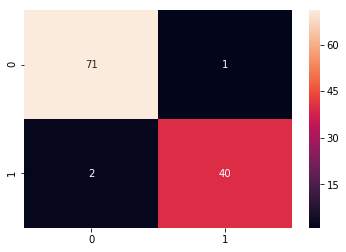

In [26]:
print 'accuracy score:', accuracy_score(Y_test, Y_pred)
print 'precision score:', precision_score(Y_test, Y_pred)
print 'recall score:',recall_score(Y_test, Y_pred)
print 'f1 score:', f1_score(Y_test, Y_pred)


cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)